# Linear Regression
- 수치예측

In [1]:
import warnings
warnings.filterwarnings('ignore')

* seaborn 'mpg' Data Set

In [2]:
import seaborn as sns

DF = sns.load_dataset('mpg')

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

* pandas DataFrame

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


## 단순 회귀

* First-Order Function

### 분석 변수 선택

In [6]:
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### 상관관계 그래프

* matplotlib

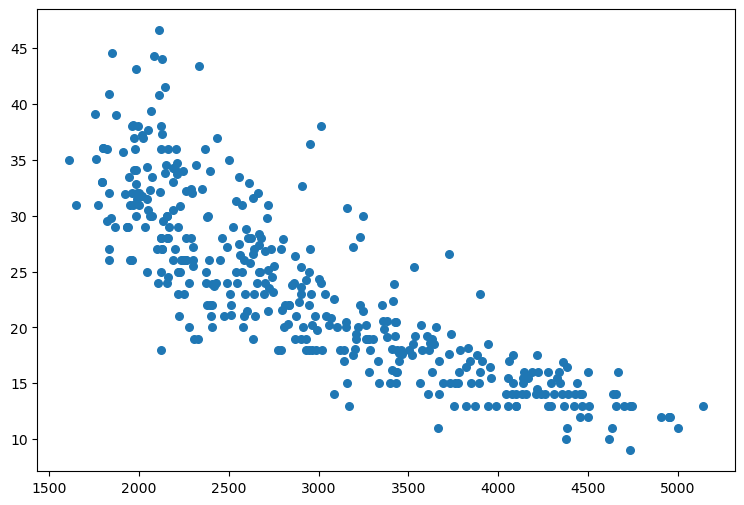

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

* seaborn

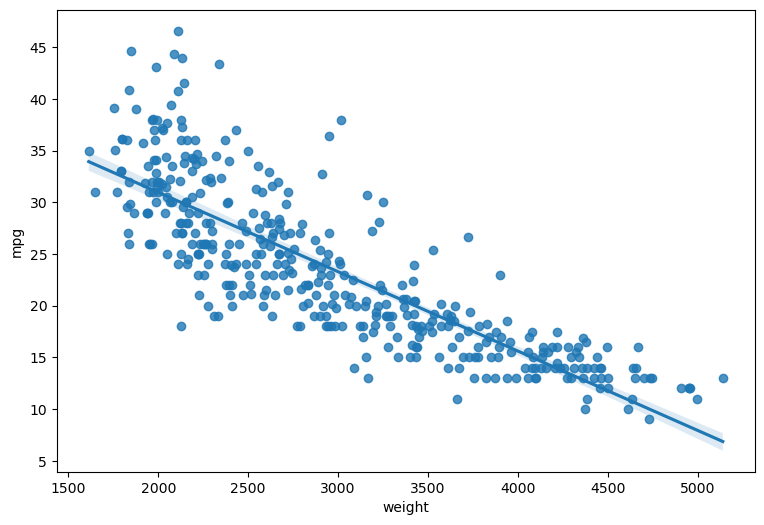

In [8]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = True)
plt.show()

* pairplot

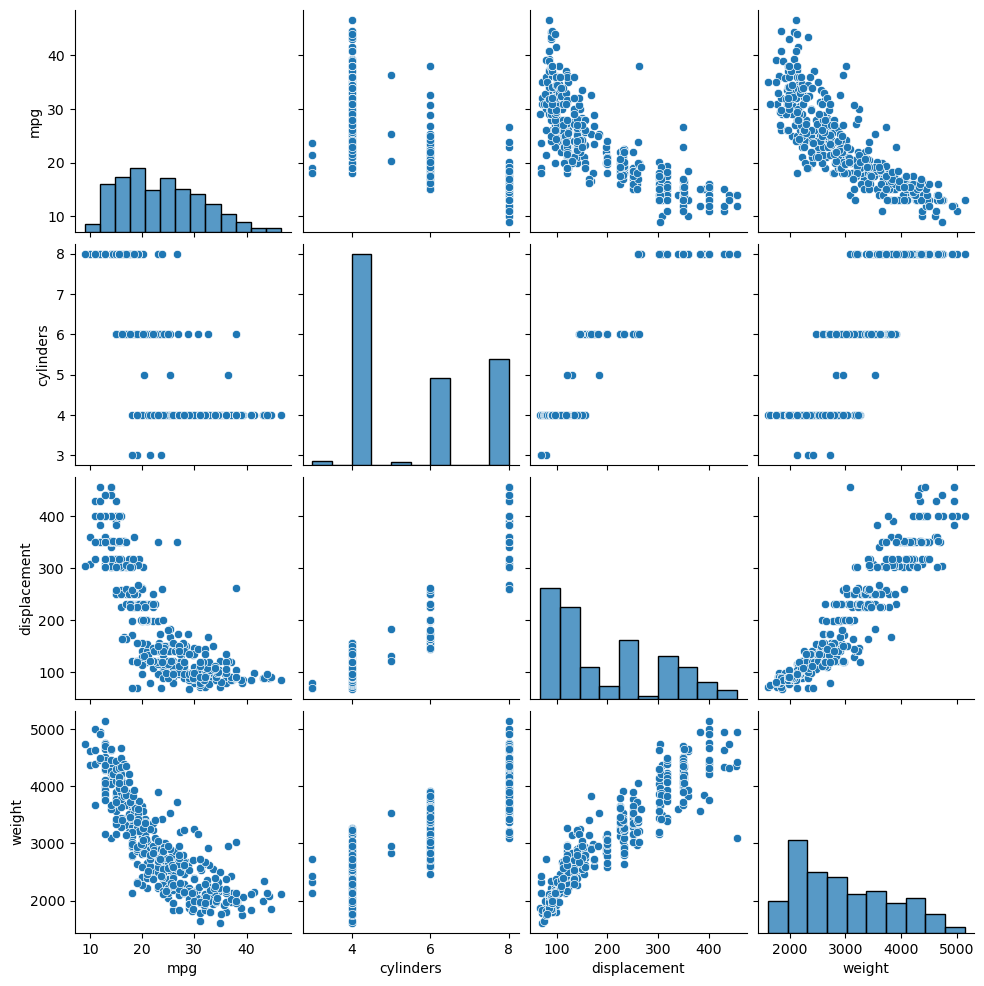

In [9]:
sns.pairplot(DF1)  
plt.show()

### 상관계수(Correlation Coefficient)

* Pearson's r

In [10]:
DF1.corr()

,mpg,cylinders,displacement,weight
mpg,1.000000,-0.775396,-0.804203,-0.831741
cylinders,-0.775396,1.000000,0.950721,0.896017
displacement,-0.804203,0.950721,1.000000,0.932824
weight,-0.831741,0.896017,0.932824,1.000000


* mpg vs. weight

In [14]:
from scipy import stats
print(stats.pearsonr(DF1.mpg, DF1.weight))
print(stats.pearsonr(DF1.mpg, DF1.weight)[0])

PearsonRResult(statistic=-0.831740933244335, pvalue=2.9727995640496354e-103)
-0.831740933244335


* mpg vs. displacement

In [12]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.804202824805898

* mpg vs. cylinders

In [13]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205543

### Train & Test Split

* 7:3

In [15]:
from sklearn.model_selection import train_test_split
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [16]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형회귀 Modeling

* 모델 생성

In [17]:
from sklearn.linear_model import LinearRegression

SR = LinearRegression()
SR.fit(X_train, y_train)

LinearRegression()

* Weight 및 Bias

In [18]:
print('weight(w) : ', SR.coef_)
print('bias(b) : ', SR.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.28223639092363


* 결정계수(R-Sqaure)

In [19]:
SR.score(X_test, y_test)

0.7164499678296495

### 모델 평가

* Mean Squared Error

In [21]:
from sklearn.metrics import mean_squared_error

y_hat_Xtest = SR.predict(X_test)

mean_squared_error(y_test, y_hat_Xtest)

17.01518447782976

### Visualization

* y vs. y_hat

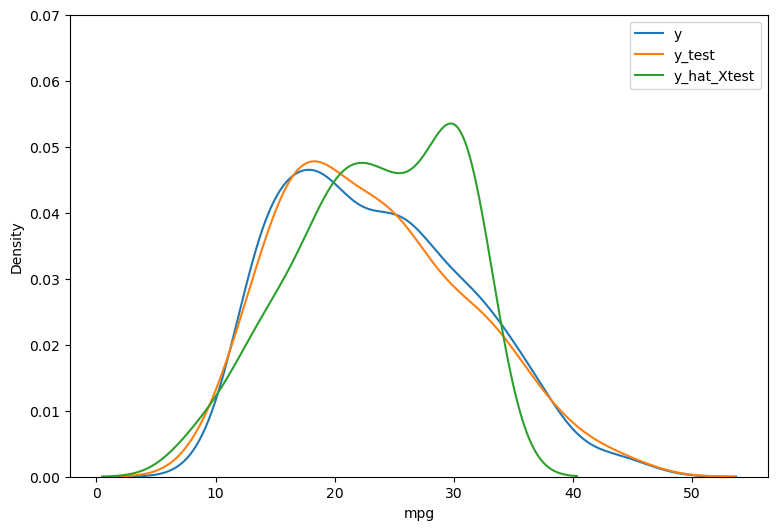

In [22]:
# 실제 정답데이터와 테스트셋 예측값에 대한 분포를 비교해보자
SR_y = y
SR_y_test = y_test
SR_y_hat_Xtest = SR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
ax2 = sns.distplot(SR_y_test, hist = False, label='y_test', ax = ax1) #  테스트셋 종속변수(정답데이터)의 분포
ax3 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1) # 테스트셋 독립변수(미훈련한 30%의 설명데이터)에 대한 회귀예측값의 분포

plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 다항 회귀
* High-Order Function

### 분석 변수 선택

In [23]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


### Train & Test Split

* 7:3

In [24]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형회귀 Modeling

* 2차 다항식 변환

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train) # X전체로 fit하면 안됨, 정답을 미리 알려주는 꼴

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


* High-Order 모델 생성

In [28]:
from sklearn.linear_model import LinearRegression

PR = LinearRegression()
PR.fit(X_train_poly, y_train)

LinearRegression()

* Weight 및 Bias

In [29]:
import numpy as np
np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', PR.coef_)
print('bias(b) : ', '%.8f' % PR.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


* 결정계수(R-Sqaure)

In [30]:
X_test_poly = poly.transform(X_test)

PR.score(X_test_poly, y_test)

0.7525521808321769

### 모델 평가

* Mean Squared Error

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, PR.predict(X_test_poly))

14.848773810921925

### Visualization

* High-Order Model

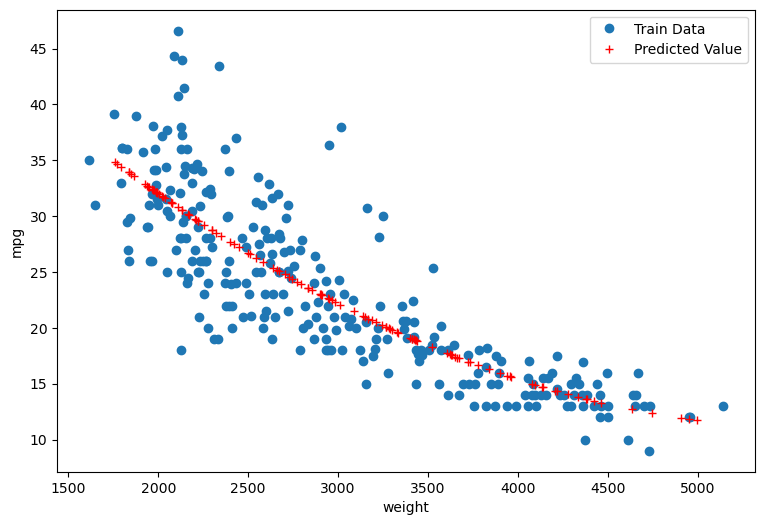

In [32]:
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, PR_y_hat_Xtest, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

* y vs. y_hat

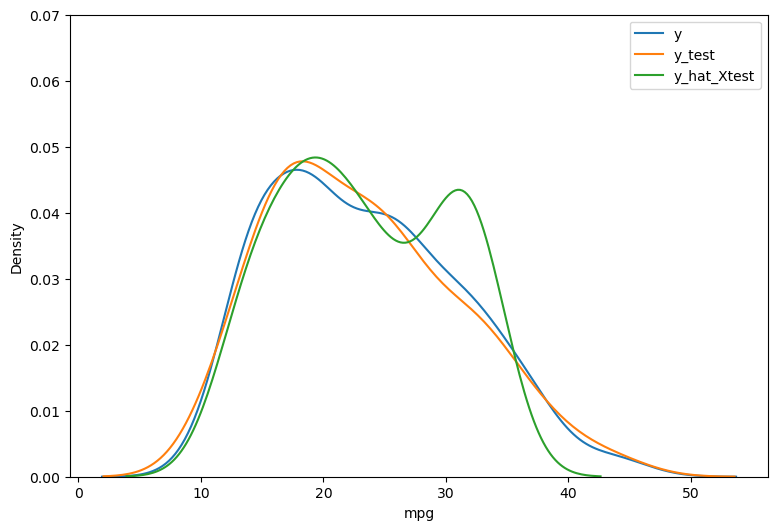

In [33]:
PR_y = y
PR_y_test = y_test
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(PR_y, hist=False, label="y")
ax2 = sns.distplot(PR_y_test, hist=False, label="y_test", ax=ax1)
ax3 = sns.distplot(PR_y_hat_Xtest, hist=False, label="y_hat_Xtest", ax=ax1)

plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 다중 회귀

### 분석 변수 선택

In [34]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### Train &Test Split

* 7:3

In [35]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


### 다중회귀 Modeling

* 모델 생성

In [36]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()   
MR.fit(X_train, y_train)

LinearRegression()

* Weight 및 Bias

In [37]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.74652237


* 결정계수(R-Sqaure)

In [38]:
MR.score?

Signature: MR.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outpu

In [39]:
MR.score(X_test, y_test)

0.7209712462851589

In [40]:
# 다중회귀모형은 조정된 결정계수를 봐야한다.
# sklean lR에서 기능을 제공하지 않으므로 추가 계산을 해야함  또는 statsmodel api를 활용할 수있음
1 - (1-MR.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.716201523999435

### 모델 평가

* Mean Squared Error

In [41]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

16.7438729692142

### Visualization

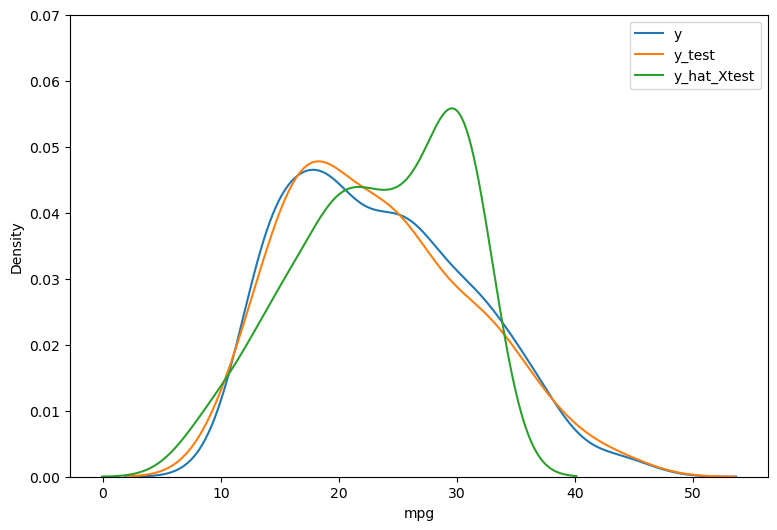

In [42]:
MR_y = y
MR_y_test = y_test
MR_y_hat_Xtest = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(MR_y, hist = False, label = 'y')
ax2 = sns.distplot(MR_y_test, hist = False, label = 'y_test')
ax3 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1)

plt.ylim(0, 0.07)
plt.legend()
plt.show()

## 단순/다항/다중회귀 비교 시각화

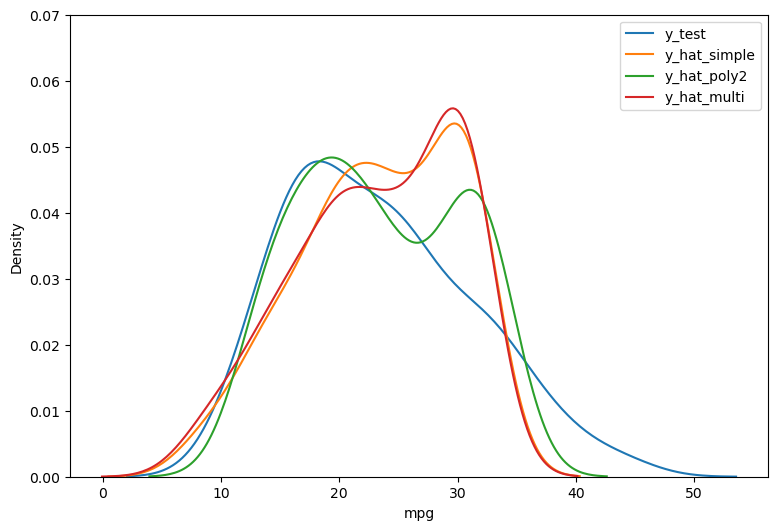

In [44]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_simple', ax = ax1) # 단순회귀
ax3 = sns.distplot(PR_y_hat_Xtest, hist = False, label='y_hat_poly2', ax = ax1) # 다항회귀 2차
ax4 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_multi', ax = ax1) # 다중회귀
plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 범주형 데이터 회귀 분석
* 문자형 변수를 숫자형 변수로 인코딩

### Encoding

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

In [2]:
import seaborn as sns

DF = sns.load_dataset('mpg')

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* 문자형 데이터 : 'origin'

In [4]:
DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
type(DF.origin[0])

str

* 명목형 : 이름확인 및 빈도분석

In [6]:
DF.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

* 'origin' Data

In [7]:
X = DF[['origin']]

In [8]:
X[111:115]

,origin
111,japan
112,usa
113,usa
114,europe


#### Label Encoder

* 정수(Integer) 인코딩

In [9]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder?

Init signature: LabelEncoder()
Docstring:     
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, *i.e.* `y`, and
not the input `X`.

Read more in the :ref:`User Guide <preprocessing_targets>`.

.. versionadded:: 0.12

Attributes
----------
classes_ : ndarray of shape (n_classes,)
    Holds the label for each class.

See Also
--------
OrdinalEncoder : Encode categorical features using an ordinal encoding
    scheme.
OneHotEncoder : Encode categorical features as a one-hot numeric array.

Examples
--------
`LabelEncoder` can be used to normalize labels.

>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6])
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are
hashable and comparable) to numerica

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
LE = encoder1.fit_transform(X)

* 정수 인코딩 결과

In [12]:
LE[111:115]

array([1, 2, 2, 0])

#### One Hot Encoder

* 원-핫(One-Hot) 인코딩

In [13]:
from sklearn.preprocessing import OneHotEncoder 

encoder2 = OneHotEncoder()
OHE = encoder2.fit_transform(X)

* Array 변환 필요

In [14]:
print(OHE[111:115])

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 0)	1.0


In [15]:
OHE.toarray()[111:115]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Scaling

* 범위(Scale)가 다른 변수의 범위(Scale)를 비슷하게 맞추기 위한 목적

In [17]:
import seaborn as sns

DF = sns.load_dataset('mpg')

* 자동차 연비(mpg) 데이터
 * mpg : miles per gallon
 * 1 mile : 1.6 Km
 * 1 gallon : 3.78 Liter

In [18]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
DF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* X, y Data

In [20]:
X = DF[['weight']]
y = DF['mpg']

#### Without Scaling

* X값 확인

In [21]:
X[:5]

,weight
0,3504
1,3693
2,3436
3,3433
4,3449


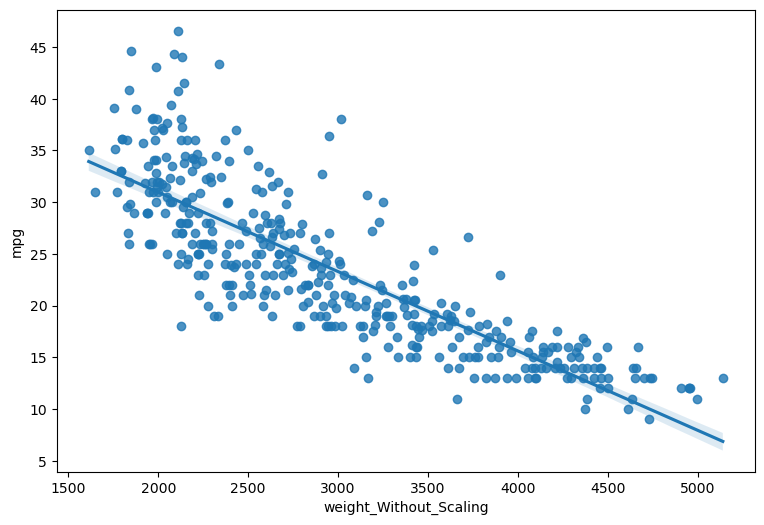

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X, y = y)
plt.xlabel('weight_Without_Scaling')
plt.show()

#### With Normalization

* sklearn Package

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X_Norm = scaler1.fit_transform(X)

* 정규화된 X값 확인

In [24]:
X_Norm[:5]

array([[0.5361497 ],
       [0.58973632],
       [0.51686986],
       [0.51601928],
       [0.52055571]])

* 정규화된 X값 모델생성

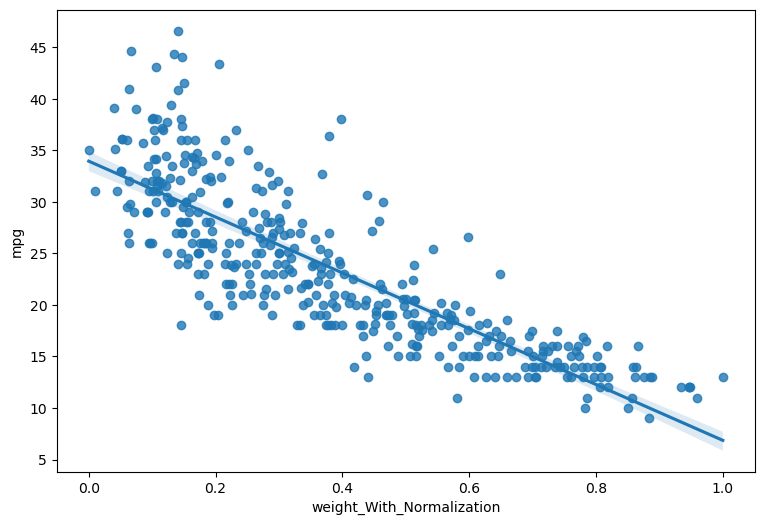

In [25]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Norm, y = y)
plt.xlabel('weight_With_Normalization')
plt.show()

#### With Standardization

* sklearn Package

In [26]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X_Stan = scaler2.fit_transform(X)

* 표준화된 X값 확인

In [27]:
X_Stan[:5]

array([[0.63086987],
       [0.85433297],
       [0.55047045],
       [0.54692342],
       [0.56584093]])

* 표준화된 X값 모델생성

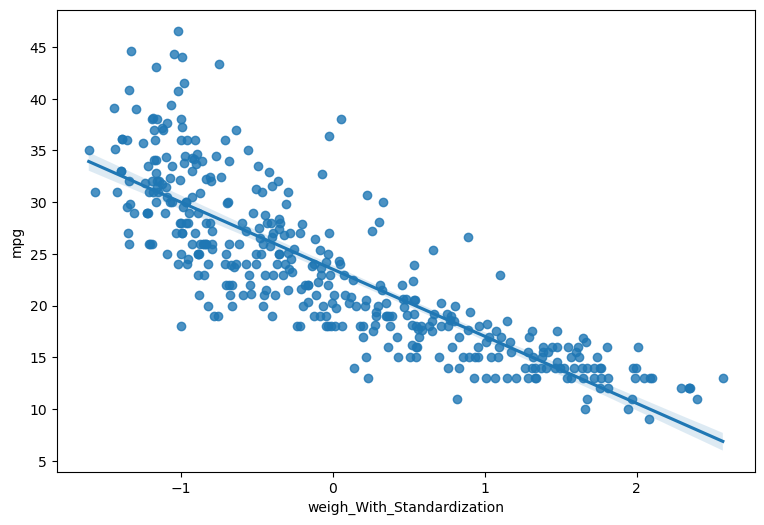

In [28]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = X_Stan, y = y)
plt.xlabel('weigh_With_Standardization')
plt.show()

## 회귀분석 연습하기
* 의료비 지출 예측 모델링

In [177]:
import warnings
warnings.filterwarnings('ignore')

### 실습용 데이터 설정

* pandas DataFrame
 - Insurance.csv

In [215]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [179]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### 탐색적 데이터 분석

* 시각화 패키지

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns 

#### 전체 의료비 분포

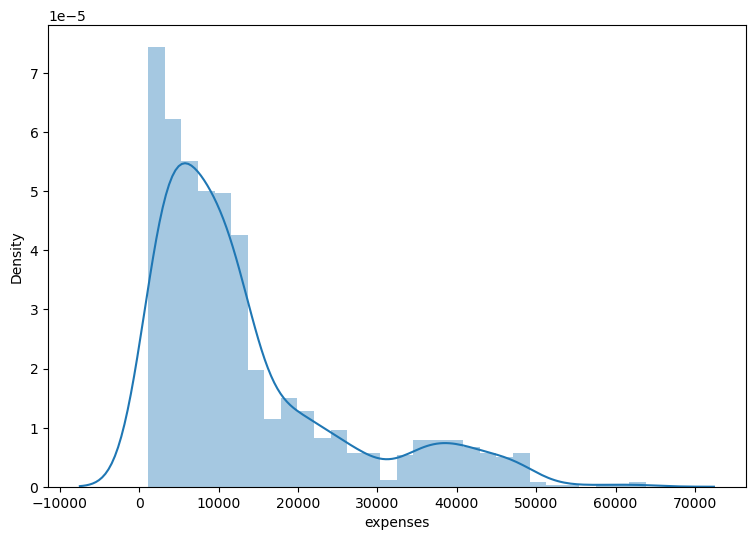

In [181]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.expenses,
             hist = True,
             kde = True)
plt.show()

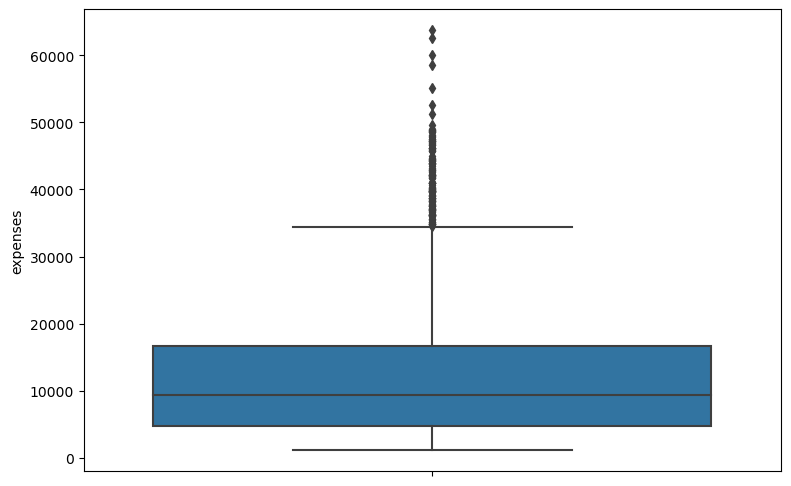

In [182]:
plt.figure(figsize = (9, 6))
sns.boxplot(y = 'expenses', data = DF)
plt.show()

#### 성별 별 의료비 분포

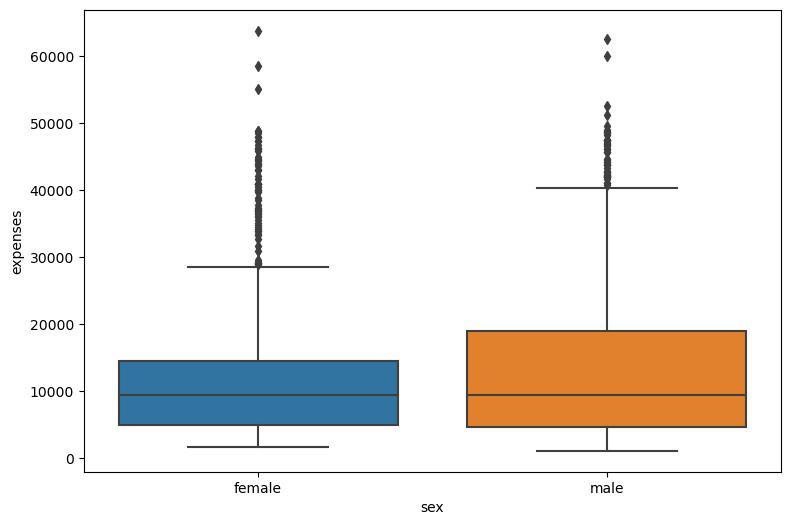

In [7]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

In [183]:
DF.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### 자녀수 별 의료비 분포

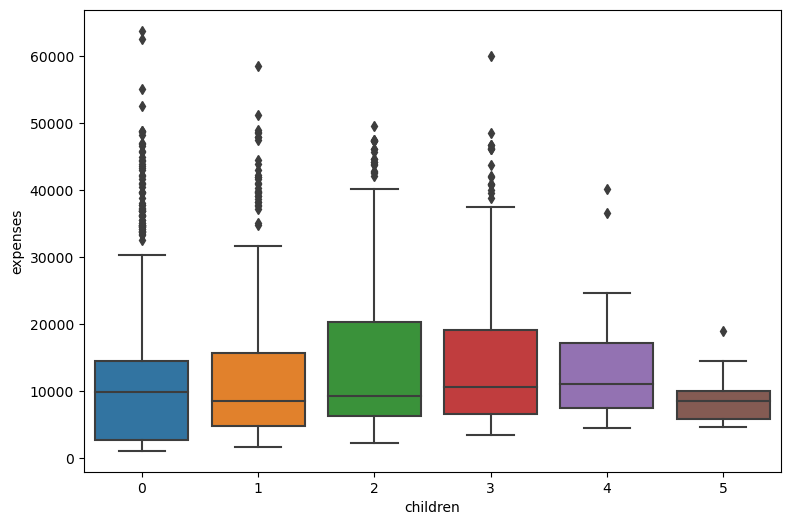

In [184]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'children', y = 'expenses', data = DF)
plt.show()

In [185]:
DF.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#### 흡연여부 별 의료비 분포

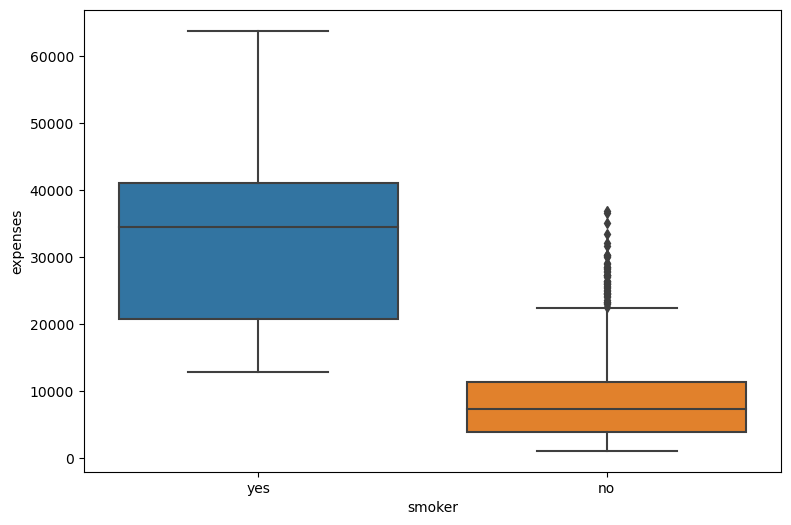

In [186]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'smoker', y = 'expenses', data = DF)
plt.show()

In [187]:
DF.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### 거주지역 별 의료비 분포

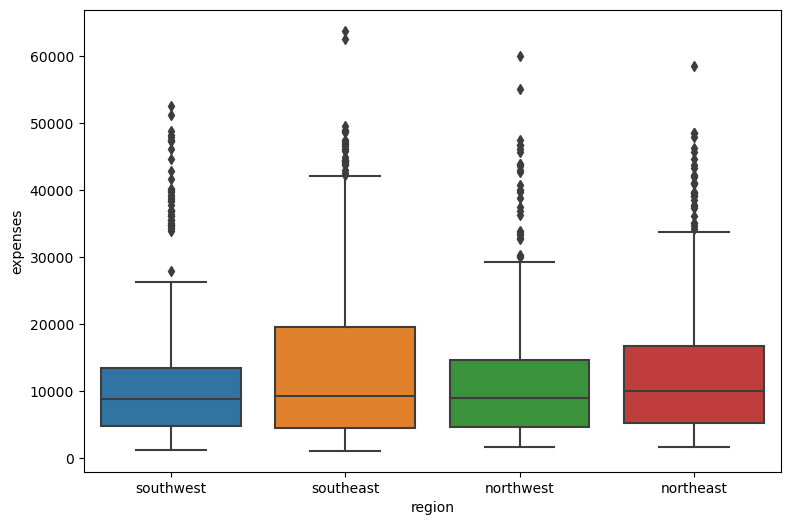

In [188]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'region', y = 'expenses', data = DF)
plt.show()

In [189]:
DF.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

#### BMI 분포 및 의료비와의 관계

* BMI 분포

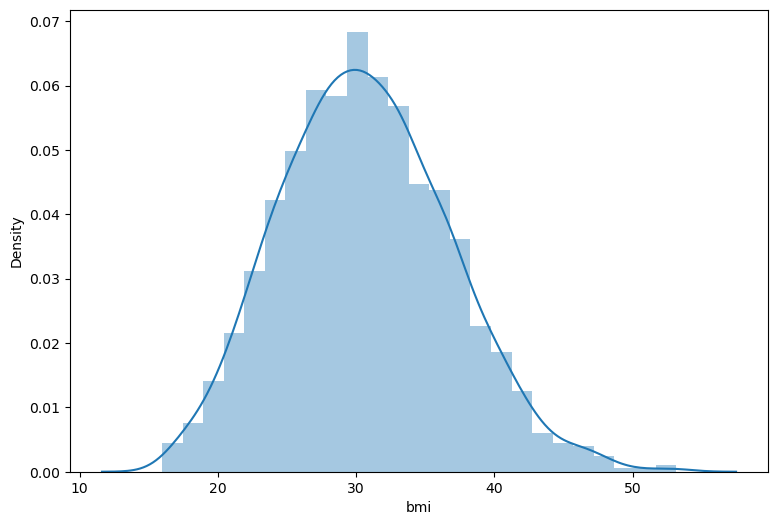

In [190]:
plt.figure(figsize = (9, 6))
sns.distplot(DF.bmi,
             hist = True,
             kde = True)
plt.show()

* BMI와 의료비 간의 관계

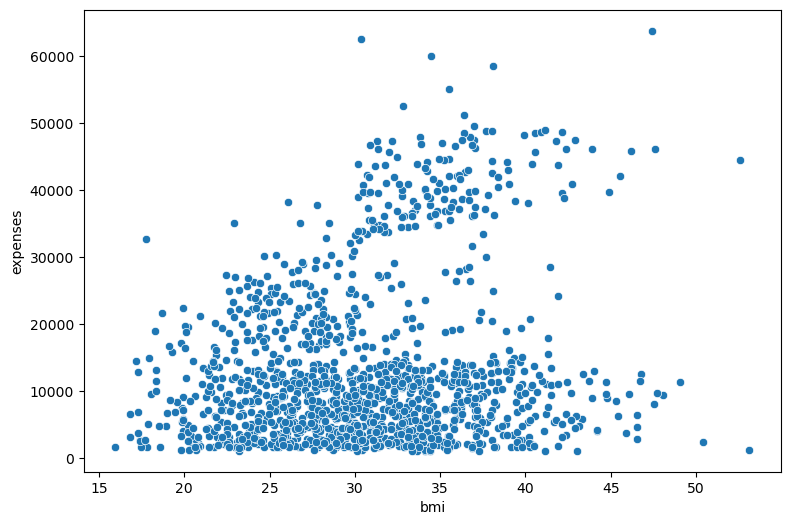

In [191]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = DF.bmi, y = DF.expenses)
plt.show()

### Modeling - sklearn Package

#### Integer Encoding

* object to int64

In [193]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* LabelEncoder( )
 - 'sex', 'smoker', 'region' to int64

In [216]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['sex'] = encoder1.fit_transform(DF.sex)

In [217]:
encoder2 = LabelEncoder()
DF['smoker'] = encoder2.fit_transform(DF.smoker)

In [218]:
encoder3 = LabelEncoder()
DF['region'] = encoder3.fit_transform(DF.region)

* Encoding 결과 확인

In [219]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


* 변경된 값 확인

In [198]:
DF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#### Train & Test Array Split(7:3)

In [224]:
from sklearn.model_selection import train_test_split

X = DF[['age', 'sex']]
y = DF['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 2) (936,)
Test Data :  (402, 2) (402,)


#### .fit( )

In [225]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

#### .predict( )

In [226]:
y_hat = RA.predict(X_test)

#### 오차(Error)값 확인

* Mean Sqaured Error - sklearn

In [227]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)

np.sqrt(mse1)

10633.607635499553

### Modeling - statsmodels Package

In [228]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Data Preprocessing

* Train & Test DataFrame Split(7:3)

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

In [ ]:
train_set.info()

#### expenses ~ age + sex

* train_set으로 모델 생성
* OLS(최소자승법) : Ordinary Least Squares

In [229]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'expenses ~ age + sex',
                  data = train_set).fit()

#### y_hat 생성

* test_set으로 y_hat(예측값) 계산

In [230]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex']])

#### 오차(Error)값 확인

* Mean Sqaured Error - sklearn

In [231]:
mse2 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse2)

10633.607635499555

### Package별 오차값 비교

In [232]:
print('sklearn     :', np.sqrt(mse1))
print('statsmodels :', np.sqrt(mse2))

sklearn     : 10633.607635499553
statsmodels : 10633.607635499555


# The End